In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
'''1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:'''



# Load data
df = pd.read_csv('/content/Walmart DataSet.csv')

# Convert date to datetime format, specifying the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort by Store and Date
df = df.sort_values(['Store', 'Date'])

# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [21]:

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


(None,
    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment
 0      1 2010-02-05  1,643,690.90             0        42.31        2.57 211.10          8.11
 1      1 2010-02-12  1,641,957.44             1        38.51        2.55 211.24          8.11
 2      1 2010-02-19  1,611,968.17             0        39.93        2.51 211.29          8.11
 3      1 2010-02-26  1,409,727.59             0        46.63        2.56 211.32          8.11
 4      1 2010-03-05  1,554,806.68             0        46.50        2.62 211.35          8.11)

In [22]:
# Get summary statistics of numerical columns
summary_stats = df.describe()

# Check correlation matrix
correlation_matrix = df.corr()


# Set display options to show all columns in one line
pd.set_option('display.width', 1000)  # Width of output display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))


print(summary_stats)
print(correlation_matrix)


         Store                 Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price      CPI  Unemployment
count 6,435.00                 6435      6,435.00      6,435.00     6,435.00    6,435.00 6,435.00      6,435.00
mean     23.00  2011-06-17 00:00:00  1,046,964.88          0.07        60.66        3.36   171.58          8.00
min       1.00  2010-02-05 00:00:00    209,986.25          0.00        -2.06        2.47   126.06          3.88
25%      12.00  2010-10-08 00:00:00    553,350.10          0.00        47.46        2.93   131.74          6.89
50%      23.00  2011-06-17 00:00:00    960,746.04          0.00        62.67        3.44   182.62          7.87
75%      34.00  2012-02-24 00:00:00  1,420,158.66          0.00        74.94        3.73   212.74          8.62
max      45.00  2012-10-26 00:00:00  3,818,686.45          1.00       100.14        4.47   227.23         14.31
std      12.99                  NaN    564,366.62          0.26        18.44        0.46    39.36       

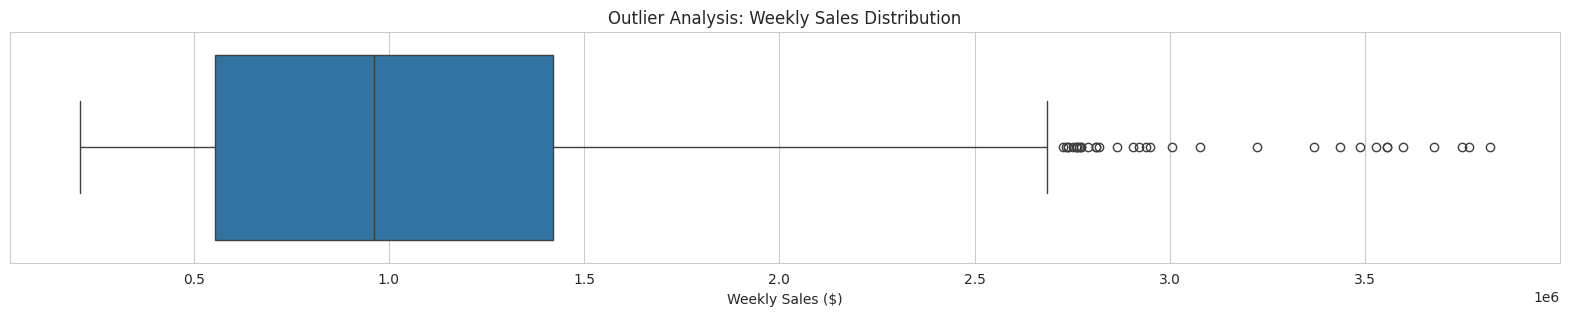

In [23]:
#Outlier Detection - Weekly Sales Boxplot
plt.figure(figsize=(20, 3))
sns.boxplot(x=df["Weekly_Sales"])
plt.title("Outlier Analysis: Weekly Sales Distribution")
plt.xlabel("Weekly Sales ($)")
plt.show()

In [24]:


'''a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?'''


#Identify Stores Most Affected by Unemployment
store_unemp_corr = df.groupby("Store")[["Weekly_Sales", "Unemployment"]].corr().iloc[0::2, -1].reset_index()
store_unemp_corr.columns = ["Store", "Metric", "Unemployment_Correlation"]
store_unemp_corr = store_unemp_corr.drop(columns=["Metric"]).sort_values(by="Unemployment_Correlation")


#Identify Stores Most Affected by Unemployment
store_unemp_corr = df.groupby("Store")[["Weekly_Sales", "Unemployment"]].corr().iloc[0::2, -1].reset_index()
store_unemp_corr.columns = ["Store", "Metric", "Unemployment_Correlation"]
store_unemp_corr = store_unemp_corr.drop(columns=["Metric"]).sort_values(by="Unemployment_Correlation")

store_unemp_corr.head()






,Store,Unemployment_Correlation
37,38,-0.79
43,44,-0.78
38,39,-0.38
41,42,-0.36
40,41,-0.35


store 38 and 44 are effected the most by Unemployment.


<ipython-input-25-2feff0d16f50>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Date"], y=df["Weekly_Sales"], ci=None)


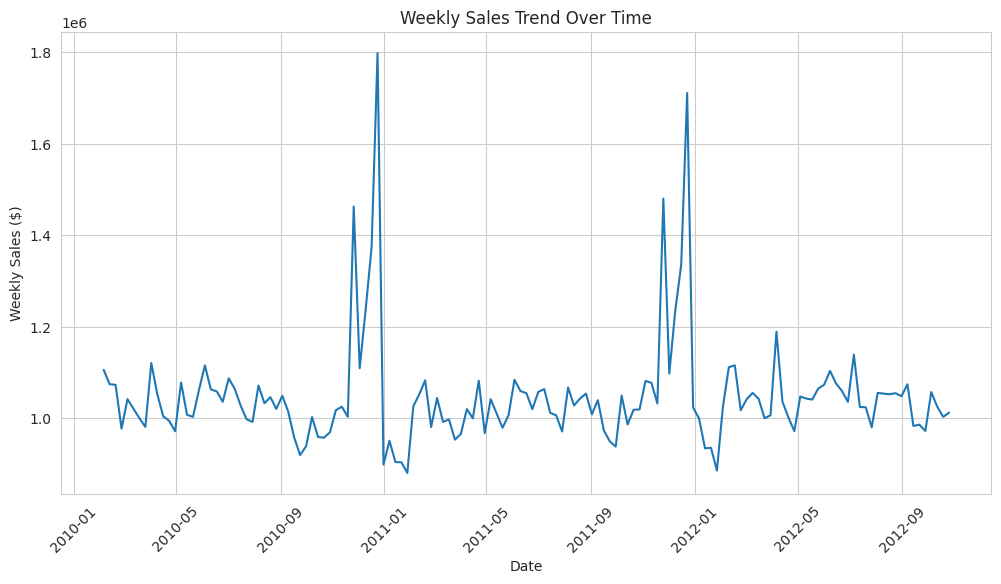

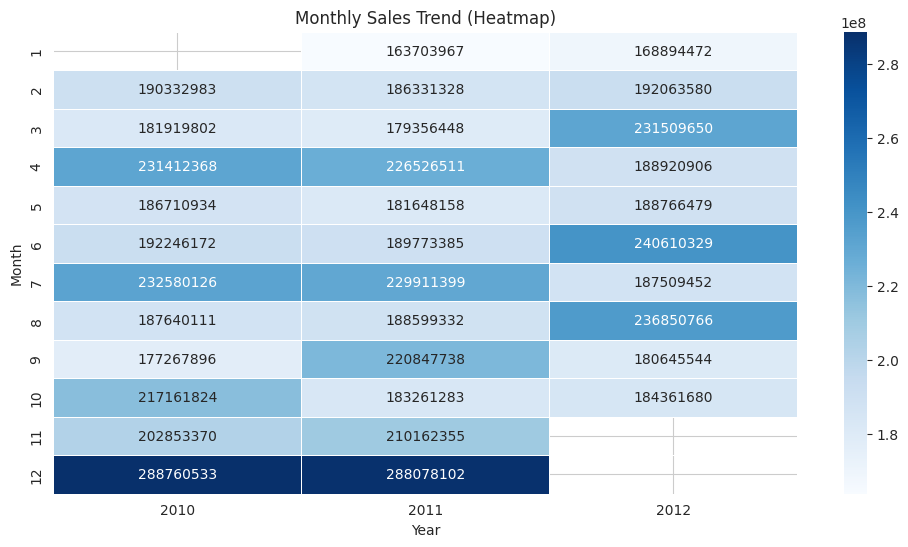

In [ ]:

'''b. If the weekly sales show a seasonal trend, when and what could be the reason?'''


    


# Set plot style
sns.set_style("whitegrid")

# 1. Seasonality Analysis - Weekly Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Weekly_Sales"], ci=None)
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.show()


# Extract Month and Year for seasonality analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Aggregate sales by month
monthly_sales = df.groupby(["Year", "Month"])["Weekly_Sales"].sum().reset_index()

# Pivot for visualization
monthly_sales_pivot = monthly_sales.pivot(index="Month", columns="Year", values="Weekly_Sales")

# Plot Monthly Sales Trends Across Years
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Sales Trend (Heatmap)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


Weather Changes – Seasonal weather variations might impact sales, especially for products related to winter or summer.

looks like more sales on 4, 7 and 12th month

Correlation between Temperature and Weekly Sales:
               Temperature  Weekly_Sales
Temperature          1.00         -0.06
Weekly_Sales        -0.06          1.00


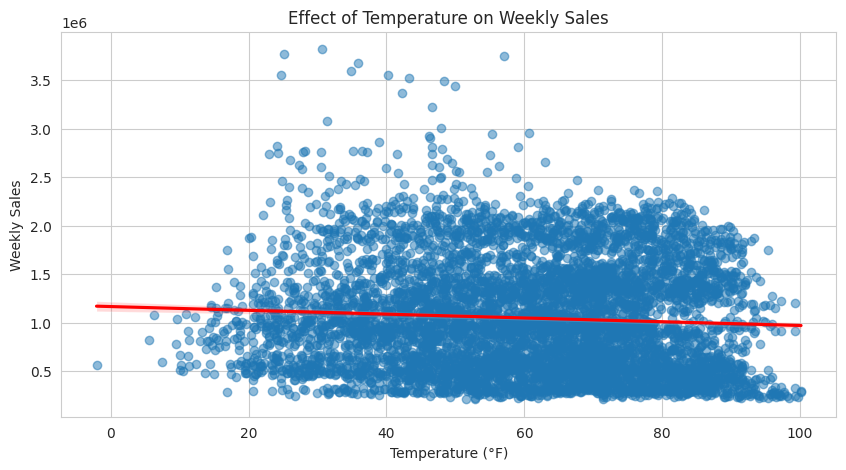

In [26]:
'''c. Does temperature affect the weekly sales in any manner?'''


# Check correlation between Temperature and Weekly Sales
correlation = df[['Temperature', 'Weekly_Sales']].corr()
print("Correlation between Temperature and Weekly Sales:\n", correlation)

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=df['Temperature'], y=df['Weekly_Sales'], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.title("Effect of Temperature on Weekly Sales")
plt.grid(True)
plt.show()

not much cab be determined with temperature impact on the sales .


Correlation between CPI and Weekly Sales: -0.07263416204017632


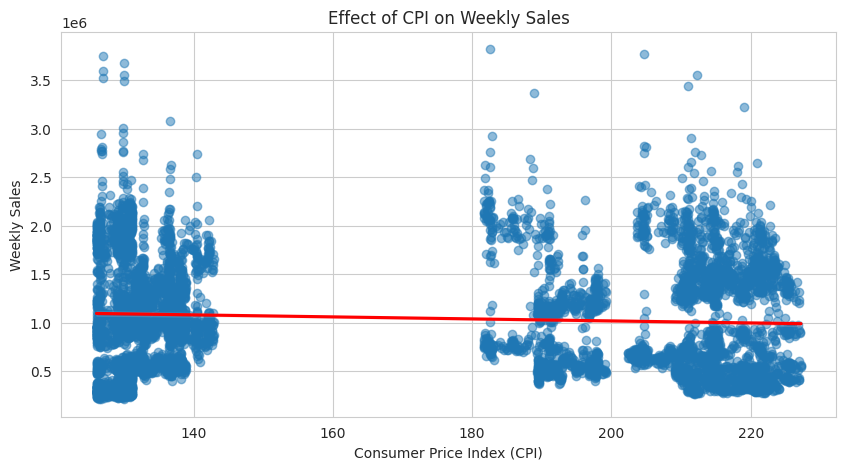


CPI vs. Sales Correlations:
    Store       level_1  Correlation
37     38  Weekly_Sales         0.81
43     44  Weekly_Sales         0.74
38     39  Weekly_Sales         0.43
40     41  Weekly_Sales         0.39
41     42  Weekly_Sales         0.36
3       4  Weekly_Sales         0.35
16     17  Weekly_Sales         0.35
2       3  Weekly_Sales         0.32
4       5  Weekly_Sales         0.31
8       9  Weekly_Sales         0.29
6       7  Weekly_Sales         0.29
36     37  Weekly_Sales         0.24
0       1  Weekly_Sales         0.23
31     32  Weekly_Sales         0.20
12     13  Weekly_Sales         0.16
30     31  Weekly_Sales         0.13
25     26  Weekly_Sales         0.13
15     16  Weekly_Sales         0.12
7       8  Weekly_Sales         0.12
33     34  Weekly_Sales         0.12
39     40  Weekly_Sales         0.11
22     23  Weekly_Sales         0.08
11     12  Weekly_Sales         0.08
10     11  Weekly_Sales         0.07
19     20  Weekly_Sales         0.06
24     25

In [27]:
'''d. How is the Consumer Price index affecting the weekly sales of various stores?'''


# Correlation between CPI and Weekly Sales
correlation = df["CPI"].corr(df["Weekly_Sales"])
print(f"Correlation between CPI and Weekly Sales: {correlation}")

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=df['CPI'], y=df['Weekly_Sales'], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("Weekly Sales")
plt.title("Effect of CPI on Weekly Sales")
plt.grid(True)
plt.show()


# Calculate correlation between CPI and Sales per store
cpi_correlations = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().iloc[::2,-1].reset_index()
# Rename columns to match the actual columns
cpi_correlations.columns = ['Store', 'level_1', 'Correlation']  # Added 'level_1' to handle the extra column
print("\nCPI vs. Sales Correlations:")
print(cpi_correlations.sort_values('Correlation', ascending=False)) # Keep this line for sorting



CPI has little to no practical impact on weekly sales. While there's a very weak negative correlation, it's so small that it's not meaningful in a real-world context.  The scatter plot visually demonstrates this lack of a strong relationship. however this can not be said for all the stores , some stores are more effected than other stores as shown on the store - correlation list .


In [28]:
'''e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
'''




#Best and Worst Performing Stores
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

print("Best  and worst Performing Stores:")

store_sales.head(), store_sales.tail()    # top stores and bottom stores and outliers

Best  and worst Performing Stores:


(Store
 20   301,397,792.46
 4    299,543,953.38
 14   288,999,911.34
 13   286,517,703.80
 2    275,382,440.98
 Name: Weekly_Sales, dtype: float64,
 Store
 38   55,159,626.42
 36   53,412,214.97
 5    45,475,688.90
 44   43,293,087.84
 33   37,160,221.96
 Name: Weekly_Sales, dtype: float64)

In [29]:
'''2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.'''




# Install Prophet if needed: pip install fbprophet
!pip install prophet
from prophet import Prophet


following we  can see forcast for store 33 and store 20 forcast for next 12 weeks , similarly we can forcast for all the stores



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ud_jcaw/qomz_jrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ud_jcaw/lgwiwhud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54070', 'data', 'file=/tmp/tmp3ud_jcaw/qomz_jrj.json', 'init=/tmp/tmp3ud_jcaw/lgwiwhud.json', 'output', 'file=/tmp/tmp3ud_jcaw/prophet_model7ac9h5jr/prophet_model-20250129055744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:57:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


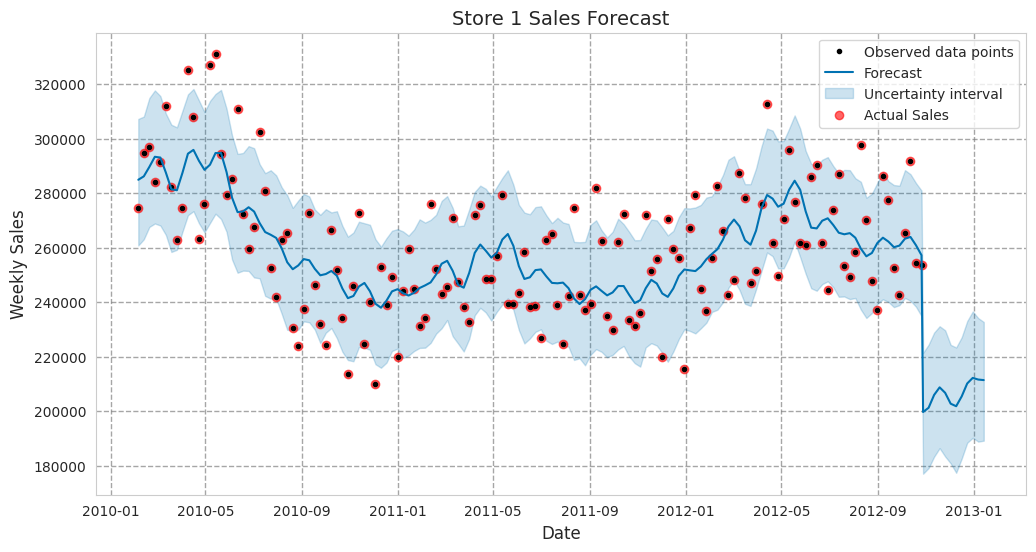

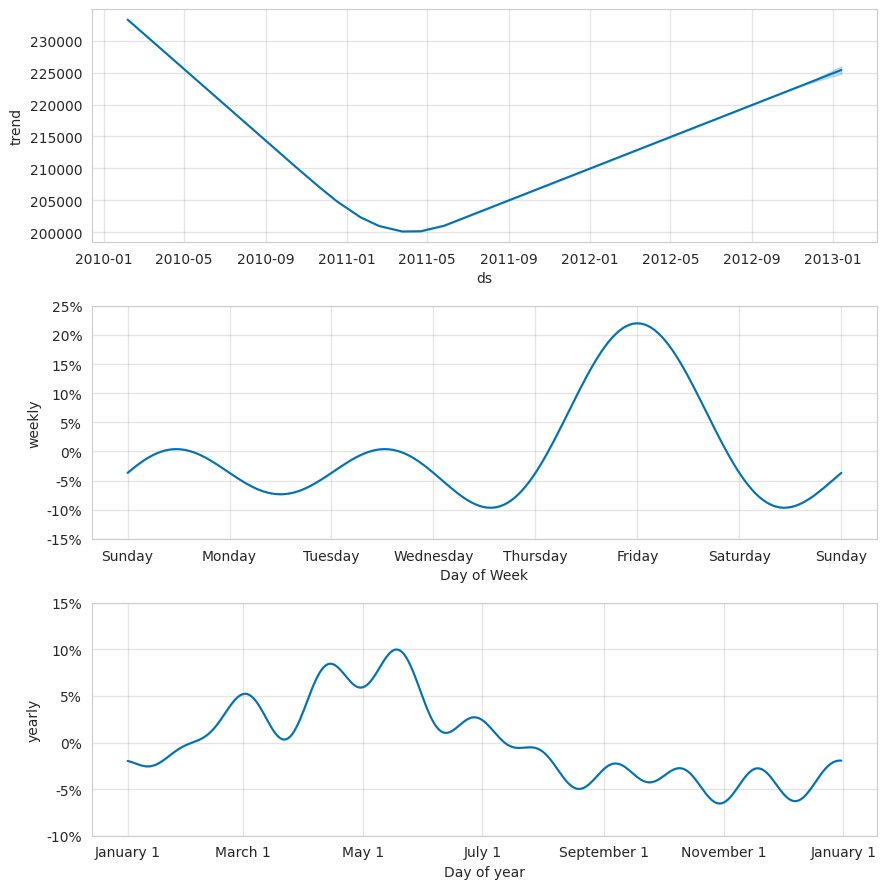

In [30]:

# Forecast for Store 33 (repeat for all stores)
store_data = df[df['Store'] == 33][['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize and fit model
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
model.fit(store_data)

# Create future dates (next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')

# Generate forecast
forecast = model.predict(future)

# Plot forecast with additional details
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.scatter(store_data['ds'], store_data['y'], color='red', label='Actual Sales', alpha=0.6)  # Add actual sales points
ax.set_title('Store 1 Sales Forecast', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Sales', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

# Optional: Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ud_jcaw/x27fs36d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ud_jcaw/7rahtocr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20000', 'data', 'file=/tmp/tmp3ud_jcaw/x27fs36d.json', 'init=/tmp/tmp3ud_jcaw/7rahtocr.json', 'output', 'file=/tmp/tmp3ud_jcaw/prophet_model68hzedsa/prophet_model-20250129055746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:57:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:57:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


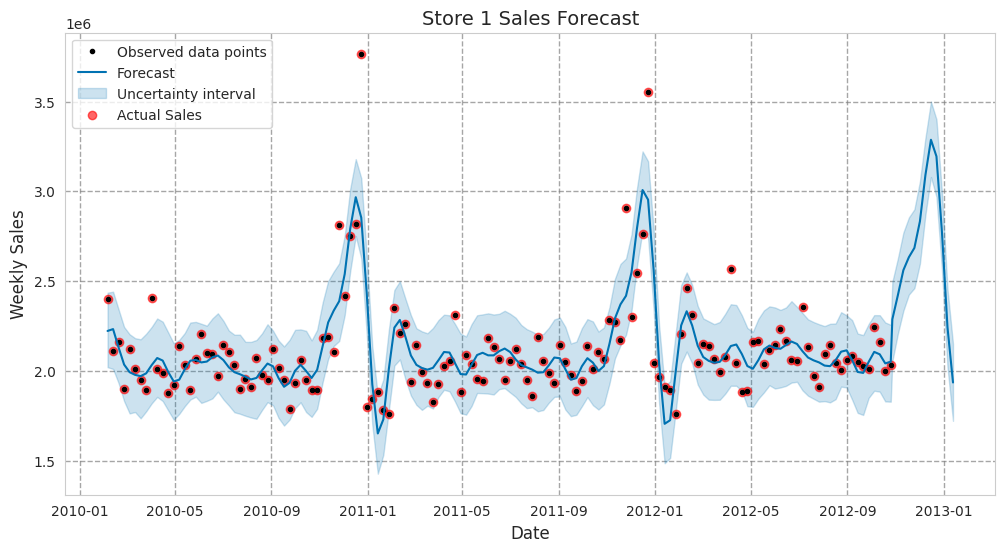

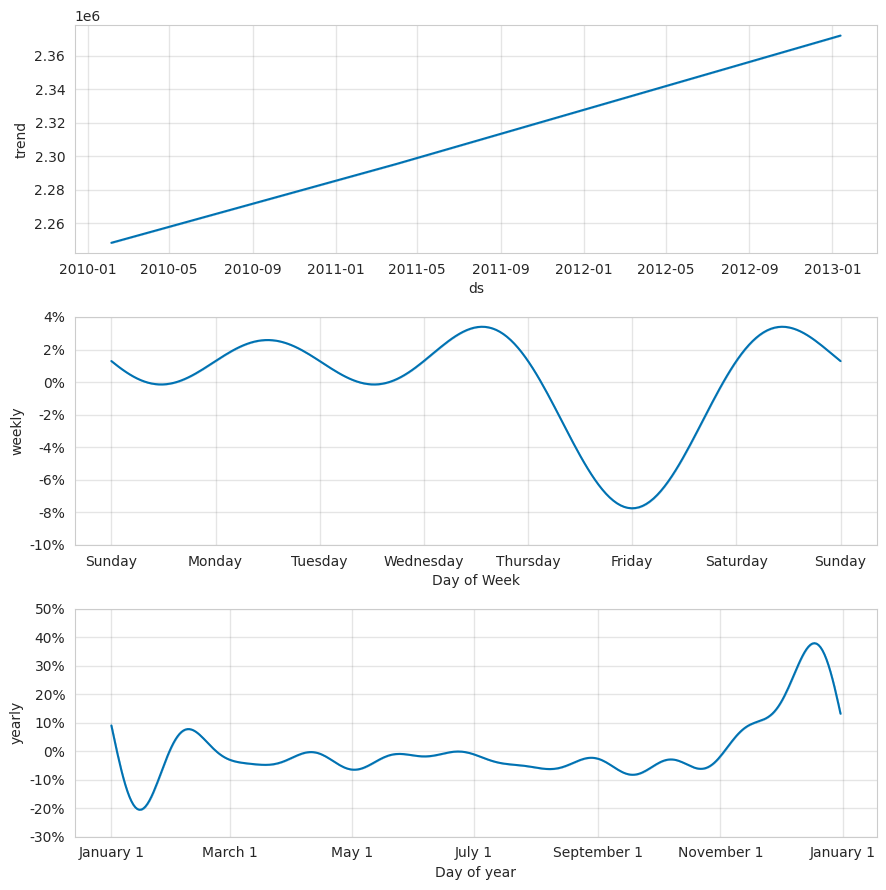

In [31]:

# Forecast for Store 20 (repeat for all stores)
store_data = df[df['Store'] == 20][['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize and fit model
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
model.fit(store_data)

# Create future dates (next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')

# Generate forecast
forecast = model.predict(future)

# Plot forecast with additional details
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.scatter(store_data['ds'], store_data['y'], color='red', label='Actual Sales', alpha=0.6)  # Add actual sales points
ax.set_title('Store 1 Sales Forecast', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Sales', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

# Optional: Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()